In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [7]:
#function to calculate the moving avg over the data (from where you are to where you are + windowWidth)
def movingAverage(data, windowWidth):
    sumVec = np.cumsum(np.insert(data, 0, 0)) 
    maVec = (sumVec[windowWidth:] - sumVec[:-windowWidth]) / windowWidth
    return maVec

In [24]:
# Read data and split into 4 variables
filename = 'dataPandaScrew_2018-12-04_01-02-01'
data = np.genfromtxt('Data/' + filename + '.csv', dtype=float, delimiter=',')
curr_time = data[:, 0]
sensed_force = data[:, 1:4] #3 columns
sensed_moment = data[:, 4:7] #3 columns
command_torques = data[:, 7:-1] #last 6 columns

windowWidth = 100
plotEvery = 100

#Calulate moving averages of the read data and store in variables
curr_time_ma = movingAverage(curr_time, windowWidth)

sensed_force_x_ma = movingAverage(sensed_force[:,0].flatten(), windowWidth)
sensed_force_y_ma = movingAverage(sensed_force[:,1], windowWidth)
sensed_force_z_ma = movingAverage(sensed_force[:,2], windowWidth)
sensed_force_ma = np.column_stack((sensed_force_x_ma, sensed_force_y_ma, sensed_force_z_ma))

sensed_moment_x_ma = movingAverage(sensed_moment[:,0], windowWidth)
sensed_moment_y_ma = movingAverage(sensed_moment[:,1], windowWidth)
sensed_moment_z_ma = movingAverage(sensed_moment[:,2], windowWidth)
sensed_moment_ma = np.column_stack((sensed_moment_x_ma, sensed_moment_y_ma, sensed_moment_z_ma))

command_torques_Fx_ma = movingAverage(command_torques[:,0], windowWidth)
command_torques_Fy_ma = movingAverage(command_torques[:,1], windowWidth)
command_torques_Fz_ma = movingAverage(command_torques[:,2], windowWidth)
command_torques_Mx_ma = movingAverage(command_torques[:,3], windowWidth)
command_torques_My_ma = movingAverage(command_torques[:,4], windowWidth)
command_torques_Mz_ma = movingAverage(command_torques[:,5], windowWidth)
command_torques_ma = np.column_stack((command_torques_Fx_ma, command_torques_Fy_ma, command_torques_Fz_ma,
                                      command_torques_Mx_ma, command_torques_My_ma, command_torques_Mz_ma))

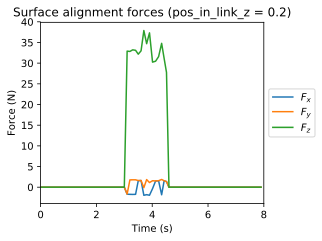

In [25]:
#Plot raw sensed forces
labels = ('$F_x$', '$F_y$', '$F_z$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(curr_time[::plotEvery], sensed_force[::plotEvery, i], label=labels[i])
#     plt.plot(curr_time[::plotEvery], sensed_force[::plotEvery, i], '-', label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Surface alignment forces (pos_in_link_z = 0.2)')
plt.ylabel('Force (N)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])

#Save plot! :) 
plt.savefig('Plots/' + filename + '_rawFs.png', dpi=300)

plt.show()

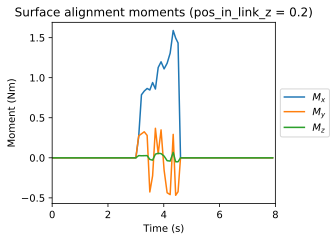

In [10]:
#Plot raw sensed moments
labels = ('$M_x$', '$M_y$', '$M_z$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[::plotEvery]), sensed_moment[::plotEvery, i], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Surface alignment moments (pos_in_link_z = 0.2)')
plt.ylabel('Moment (Nm)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])

plt.show()

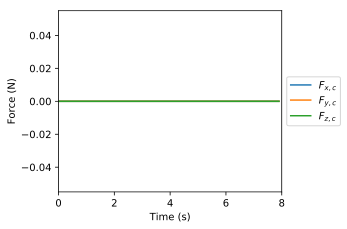

In [11]:
#Plot raw command forces
labels = ('$F_{x,c}$', '$F_{y,c}$', '$F_{z,c}$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[::plotEvery]), command_torques[::plotEvery, i], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Force (N)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])
plt.show()

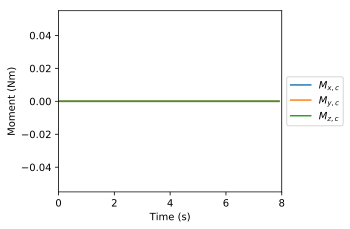

In [12]:
#Plot raw command moments
labels = ('$M_{x,c}$', '$M_{y,c}$', '$M_{z,c}$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[::plotEvery]), command_torques[::plotEvery, i+3], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Moment (Nm)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])
plt.show()

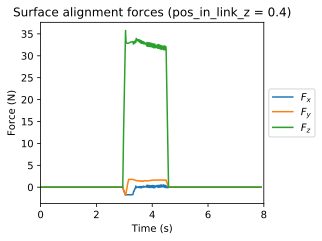

In [13]:
#Plot average sensed forces (used for surf2surf data)

labels = ('$F_x$', '$F_y$', '$F_z$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[:-(windowWidth-1)]), sensed_force_ma[:, i], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Surface alignment forces (pos_in_link_z = 0.4)')
plt.ylabel('Force (N)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])

plt.savefig('align_0_4_forces.png', dpi=300)

plt.show()

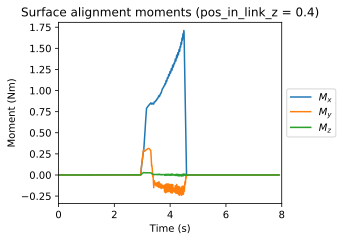

In [14]:
#Plot average sensed moments (used for surf2surf data)

labels = ('$M_x$', '$M_y$', '$M_z$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[:-(windowWidth-1)]), sensed_moment_ma[:, i], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Surface alignment moments (pos_in_link_z = 0.4)')
plt.ylabel('Force (N)')
plt.ylabel('Moment (Nm)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])

plt.savefig('align_0_4_moments.png', dpi=300)

plt.show()

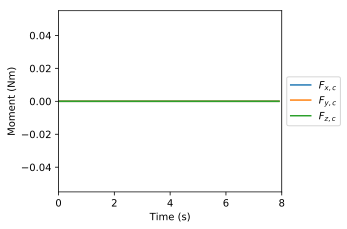

In [15]:
#Plot average command forces (used for surf2surf data)

labels = ('$F_{x,c}$', '$F_{y,c}$', '$F_{z,c}$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[:-(windowWidth-1):plotEvery]), command_torques_ma[::plotEvery, i], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Moment (Nm)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])
plt.show()

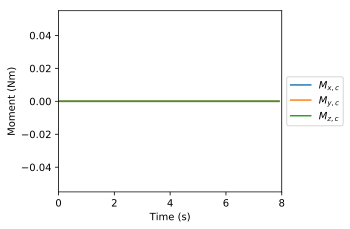

In [16]:
#Plot average command moments (used for surf2surf data)

labels = ('$M_{x,c}$', '$M_{y,c}$', '$M_{z,c}$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(np.sort(curr_time[:-(windowWidth-1):plotEvery]), command_torques_ma[::plotEvery, i+3], label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Moment (Nm)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])
plt.show()